# Week 7

In [97]:
# Imports & Seed
seed = 0 # for reproducibility

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [98]:
# ***************************************************** #
# Gap statistics method function from lecture material: #
# ***************************************************** #

def compute_gap_statistic(data, n_refs=10, max_k=10):
    shape = data.shape
    gaps  = np.zeros(max_k-1)
    
    for k in range(1, max_k):
        # fit kmeans to original data
        km   = KMeans(n_clusters=k+1, random_state=42)
        km.fit(data)
        wcss = km.inertia_
        
        # fit kmeans to reference datasets
        ref_wcss = np.zeros(n_refs)
        for i in range(n_refs):
            random_ref = np.random.uniform(np.min(data, axis=0), np.max(data, axis=0), size=shape)
            km_ref = KMeans(n_clusters=k+1, random_state=42)
            km_ref.fit(random_ref)
            ref_wcss[i] = km_ref.inertia_
        
        # compute Gap statistic
        gaps[k-1] = np.log(np.mean(ref_wcss)) - np.log(wcss)
    return gaps

## Python exercises for clustering

In [99]:
# 1
sale = pd.read_csv("wholesale.csv",sep=",")

print(f"{sale.info()}\n")
print(f"{sale.describe()}\n")
print(f"{sale.head()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
 8   Beverages         440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB
None

          Channel      Region          Fresh          Milk        Grocery  \
count  440.000000  440.000000     440.000000    440.000000     440.000000   
mean     1.636364    2.543182   12000.297727   3071.931818    9122.202273   
std      0.736021    0.774272   12647.328865   4854.673333   10971.428903   
min      1.000000    1.000000       3.000000    

In [100]:
# i)
print(sale.isnull().sum()) # no missing values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Beverages           0
dtype: int64


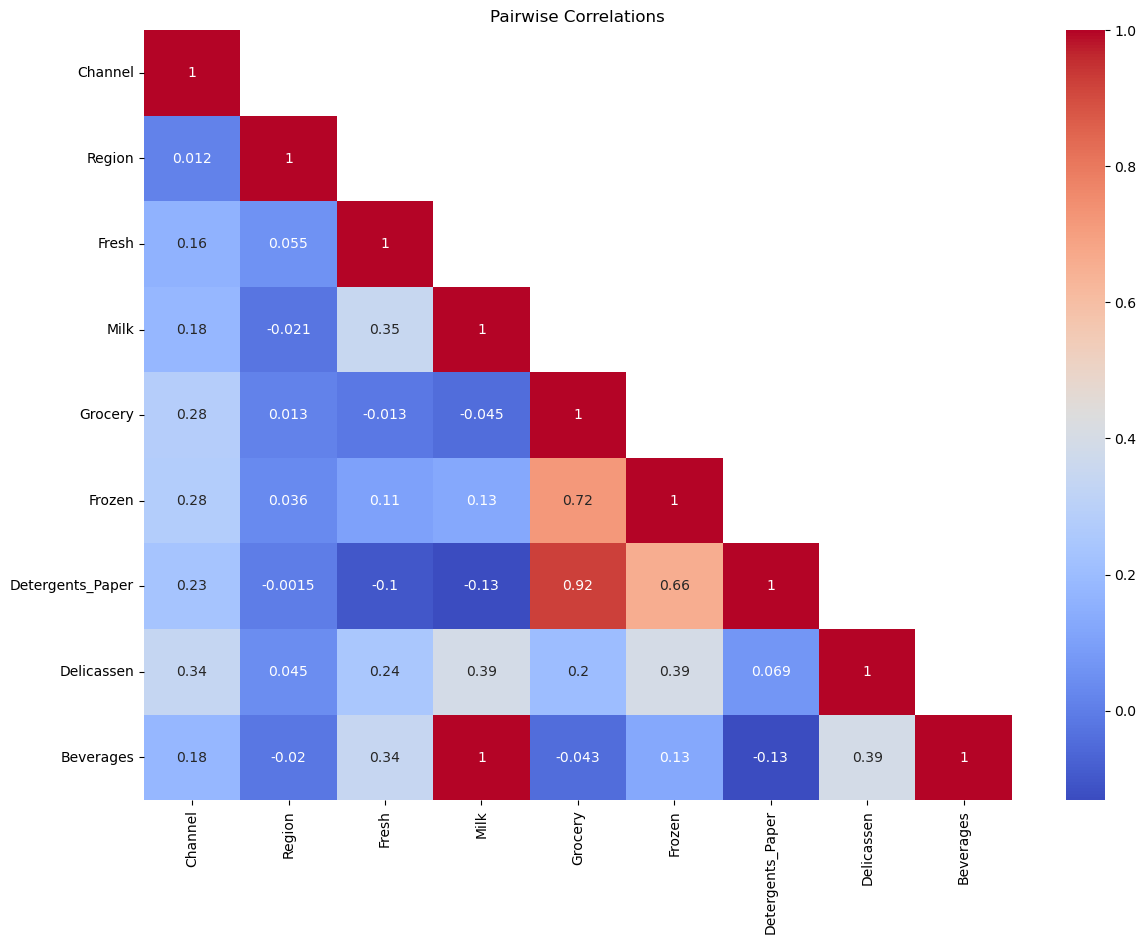

In [101]:
# ii)
corr_matrix = sale.corr()
mask_upper = np.triu(corr_matrix,k=1) # remove upper part, include diagonal (k=1)

fig1, ax1 = plt.subplots(figsize=(14,10))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",mask=mask_upper)

plt.title("Pairwise Correlations")
plt.show()

There are some highly correlated variables present in the dataset:

- Milk & Beverages (1)
- Grocery & Detergents_Paper (0.92)
- Grocery & Frozen (0.72)
- Frozen & Detergents_Paper (0,66)

Otherwise the correlations are below absolute 0.50.

In [102]:
# iii)
scaler = MinMaxScaler()
sale_scaled = scaler.fit_transform(sale)

# iv)
optimal_k = {"wcss":[],"silhouette":[],"gap":[]}
shape = sale_scaled.shape

for k in range(1,16):
    kmeans = KMeans(n_clusters=k,random_state=seed)
    kmeans.fit(sale_scaled)

    # Elbow method
    optimal_k["wcss"].append(kmeans.inertia_)

    # Silhouette method
    if k < 2:
        pass # silhouette score calculation requires k >= 2
    else:
        labels = kmeans.fit_predict(sale_scaled)
        score = silhouette_score(sale_scaled,labels)
        optimal_k["silhouette"].append(score)

# Gap statistics method
optimal_k["gap"] = compute_gap_statistic(sale_scaled,n_refs=10,max_k=15)

print(optimal_k)

c:\Users\Niklas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Niklas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Niklas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Niklas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

{'wcss': [152.20929529504707, 100.96765875098777, 55.7743351867698, 44.05691991774758, 32.333460119739925, 28.17566731225265, 24.368573846507946, 21.8933674828824, 18.915280468315327, 17.93443534051712, 16.72986967540213, 12.715435732360143, 12.235292689127636, 11.447317023127754, 10.869029920402792], 'silhouette': [0.39308349475639454, 0.5012694705180656, 0.5270583209713913, 0.5581523098657492, 0.5653739195738476, 0.5788315795259384, 0.6070888439005071, 0.6175921422808748, 0.6027971716303748, 0.506723168855955, 0.5226274334816838, 0.5208532423256707, 0.5211183922436787, 0.48916998314167365], 'gap': array([1.08312907, 1.14678257, 1.79811324, 1.80159439, 1.80065853,
       2.06103373, 2.28611224, 2.49807653, 2.63876529, 2.69200766,
       2.75237286, 2.80251691, 2.8528856 , 2.87993172])}


c:\Users\Niklas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Niklas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Niklas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Niklas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

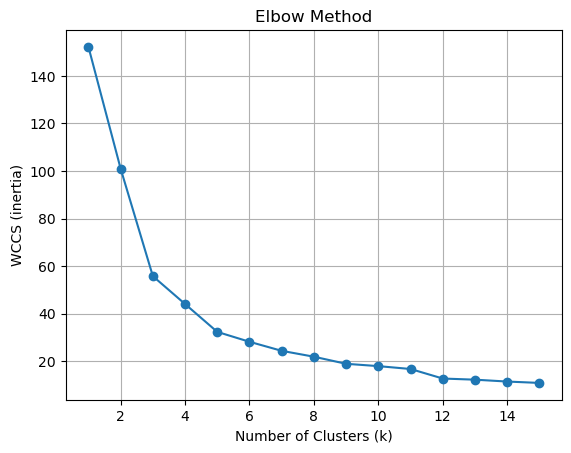

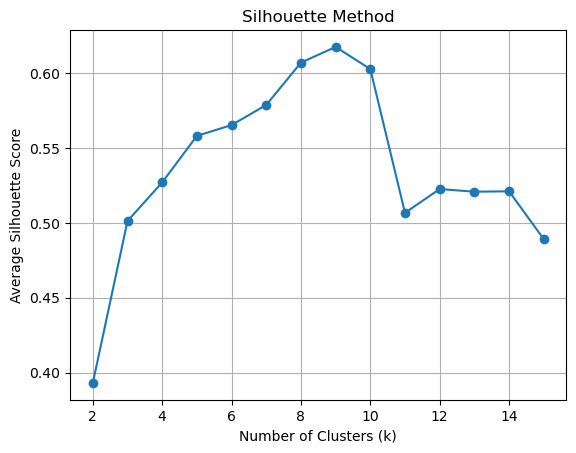

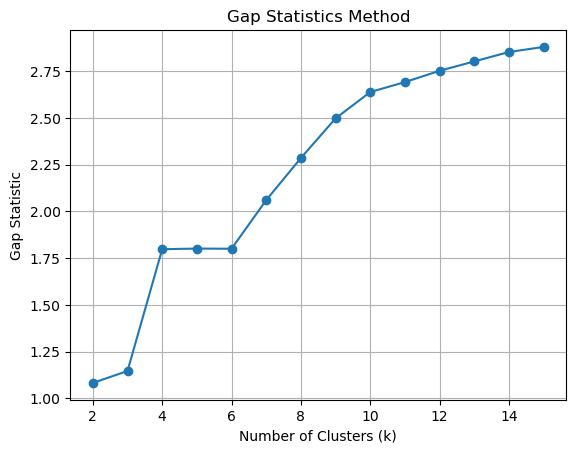

In [103]:
k_vals1 = range(1,16)
k_vals2 = range(2,16)

fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()

ax2.plot(k_vals1,optimal_k["wcss"],marker="o")
ax2.set_title("Elbow Method")
ax2.set_xlabel("Number of Clusters (k)")
ax2.set_ylabel("WCCS (inertia)")
ax2.grid(True)

ax3.plot(k_vals2,optimal_k["silhouette"],marker="o")
ax3.set_title("Silhouette Method")
ax3.set_xlabel("Number of Clusters (k)")
ax3.set_ylabel("Average Silhouette Score")
ax3.grid(True)

ax4.plot(k_vals2,list(optimal_k["gap"]),marker="o")
ax4.set_title("Gap Statistics Method")
ax4.set_xlabel("Number of Clusters (k)")
ax4.set_ylabel("Gap Statistic")
ax4.grid(True)

plt.show()

The methods give all different results for optimal k-values:

- Elbow method: 5
- Silhouette method: 9
- Gap statistics method: 15

Out of these three, 9 seems to be most reasonable when comparing how different k-values fare in all the methods. It is also the middlepoint.

c:\Users\Niklas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


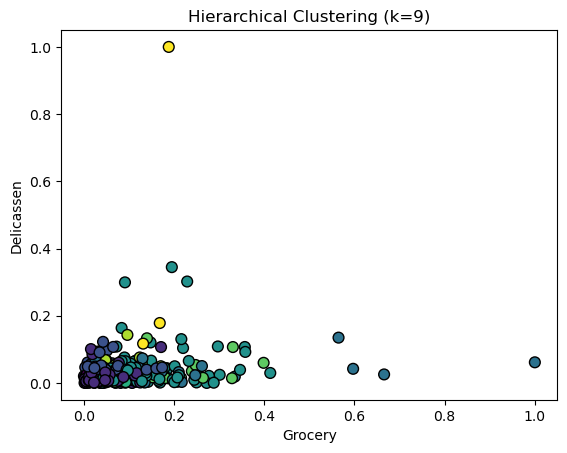

In [104]:
# v)
kmeans_final = KMeans(n_clusters=9,random_state=seed)
kmeans_final.fit(sale_scaled)

# vi)
# Indices:
# 0: Channel
# 1: Region
# 2: Fresh
# 3: Milk
# 4: Grocery
# 5: Frozen
# 6: Detergents_Paper
# 7: Delicassen
# 8: Beverages

labels = kmeans_final.labels_
centroids = kmeans_final.cluster_centers_

fig5, ax5 = plt.subplots()
ax5.scatter(x=sale_scaled[:,4],
            y=sale_scaled[:,7],
            c=labels,s=60,edgecolor="k")

ax5.set_title("Hierarchical Clustering (k=9)")
ax5.set_xlabel("Grocery")
ax5.set_ylabel("Delicassen")

plt.show()

With the given data and the number of clusters, the result doesn't make much sense. No distinct clusters are seen for Delicassen and Grocery, as much of the data points are packed near the origin.

In this case, removing outliers before scaling might help, as only two data points can be found near x=1 and y=1.